In [1]:
from DataLoader import DataLoader
import datetime as dt
import polars as pl

In [2]:
loader = DataLoader('./data', 'csv')

In [3]:
df = loader.load_dates(start_date="20200101", end_date="20200510")

<Axes: xlabel='Date', ylabel='VIX'>

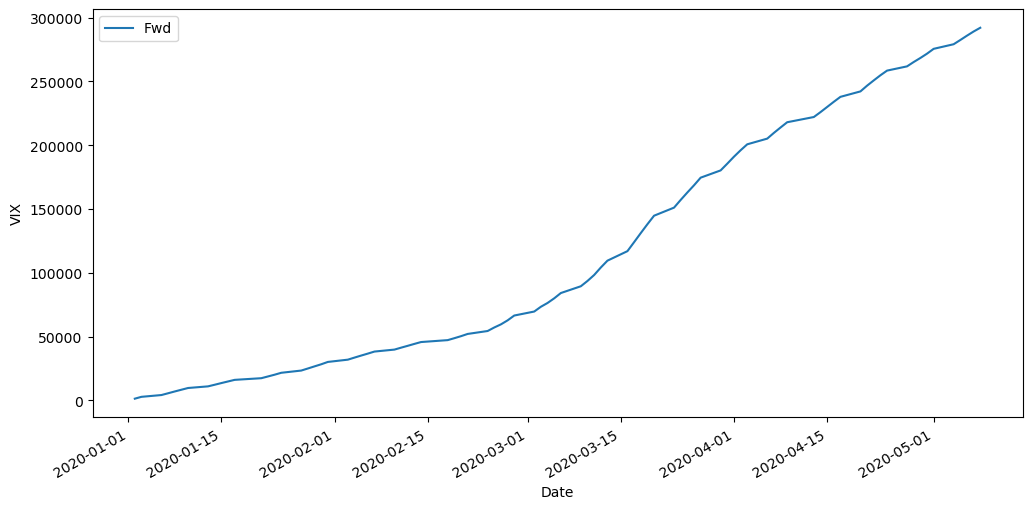

In [9]:
(df.unique(subset=['Date']).sort('Date')[['Date', 'Fwd']].to_pandas().set_index('Date') * 100).abs().cumsum().plot(figsize=(12, 6), ylabel='VIX')

In [5]:
dd = "20200101"

In [17]:
dt.datetime.strptime(dd, "%Y%m%d")

datetime.datetime(2020, 1, 1, 0, 0)

In [20]:
df = df.with_columns(
    Date=pl.lit(dt.datetime.strptime(dd, "%Y%m%d"))
)

In [28]:
df.with_columns(
    Bid=pl.when(pl.col("Bid") == "NA").then(None).otherwise(pl.col("Bid")).cast(pl.Float64)
)

ShapeError: unable to add a column of length 31682 to a DataFrame of height 44422

In [11]:
df[:, 1:]

Expiry,Texp,Strike,Bid,Ask,Fwd,CallMid,Date
i64,f64,f64,f64,f64,f64,f64,datetime[μs]
20200429,0.013689,30.0,1.025862,1.104071,36.717172,6.809163,2020-04-24 00:00:00
20200429,0.013689,32.5,0.635407,2.058893,36.717172,5.055916,2020-04-24 00:00:00
20200429,0.013689,35.0,1.084078,1.668571,36.717172,3.264791,2020-04-24 00:00:00
20200429,0.013689,37.5,0.991228,1.245027,36.717172,1.569264,2020-04-24 00:00:00
20200429,0.013689,40.0,1.108002,1.145441,36.717172,0.784632,2020-04-24 00:00:00
…,…,…,…,…,…,…,…
20201118,0.76386,60.0,0.6866,0.772332,17.865646,0.229592,2020-02-13 00:00:00
20201118,0.76386,65.0,0.679018,0.783229,17.865646,0.178571,2020-02-13 00:00:00
20201118,0.76386,70.0,0.648108,0.786417,17.865646,0.127551,2020-02-13 00:00:00
